# Downloading the required libraries and uploading the dataset into dataframe

In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file dialog for you to upload files

Saving HTRU_2.csv to HTRU_2.csv


In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


# Dataset Analysis  

Naming the columns of the dataframe appropriately and analysing the dataset using info and head functions.
Also, finding if there are any null or incorrect values in dataset.  
As seen from the below output, no Null values are to be seen.  


In [ ]:
import pandas as pd
pulsar = pd.read_csv("HTRU_2.csv",header=None)
#pulsar.head()

pulsar.rename(columns={0: 'meanip', 1: 'stdip', 2: 'kurtip', 3: 'skewip', 4: 'meandmsnr', 5: 'stddmsnr', 6: 'kurtdmsnr', 7: 'skewdmsnr',8:'pulsar'}, inplace=True)

pulsar.info()
pulsar.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   meanip     17898 non-null  float64
 1   stdip      17898 non-null  float64
 2   kurtip     17898 non-null  float64
 3   skewip     17898 non-null  float64
 4   meandmsnr  17898 non-null  float64
 5   stddmsnr   17898 non-null  float64
 6   kurtdmsnr  17898 non-null  float64
 7   skewdmsnr  17898 non-null  float64
 8   pulsar     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,meanip,stdip,kurtip,skewip,meandmsnr,stddmsnr,kurtdmsnr,skewdmsnr,pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Exploratory Data Analysis  


Plotting the histogram, bar plot, correlation plot and box charts to understand more about the data.  

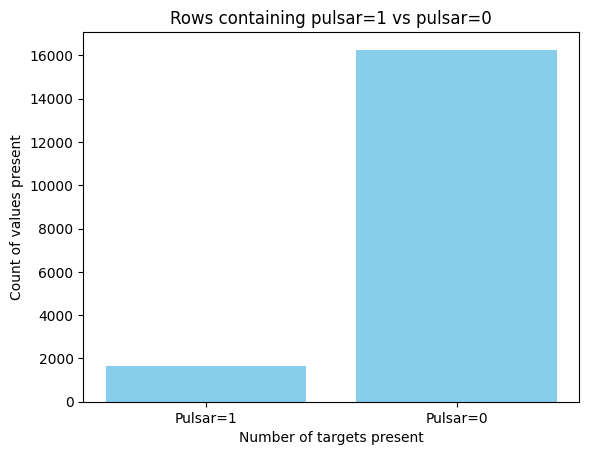

In [ ]:
import matplotlib.pyplot as plt
count_1 = pulsar[pulsar['pulsar'] == 1].shape[0]
count_0 = pulsar[pulsar['pulsar'] == 0].shape[0]

plt.bar(['Pulsar=1','Pulsar=0'], [count_1,count_0], color='skyblue')

plt.xlabel('Number of targets present')
plt.ylabel('Count of values present')
plt.title('Rows containing pulsar=1 vs pulsar=0')

plt.show()


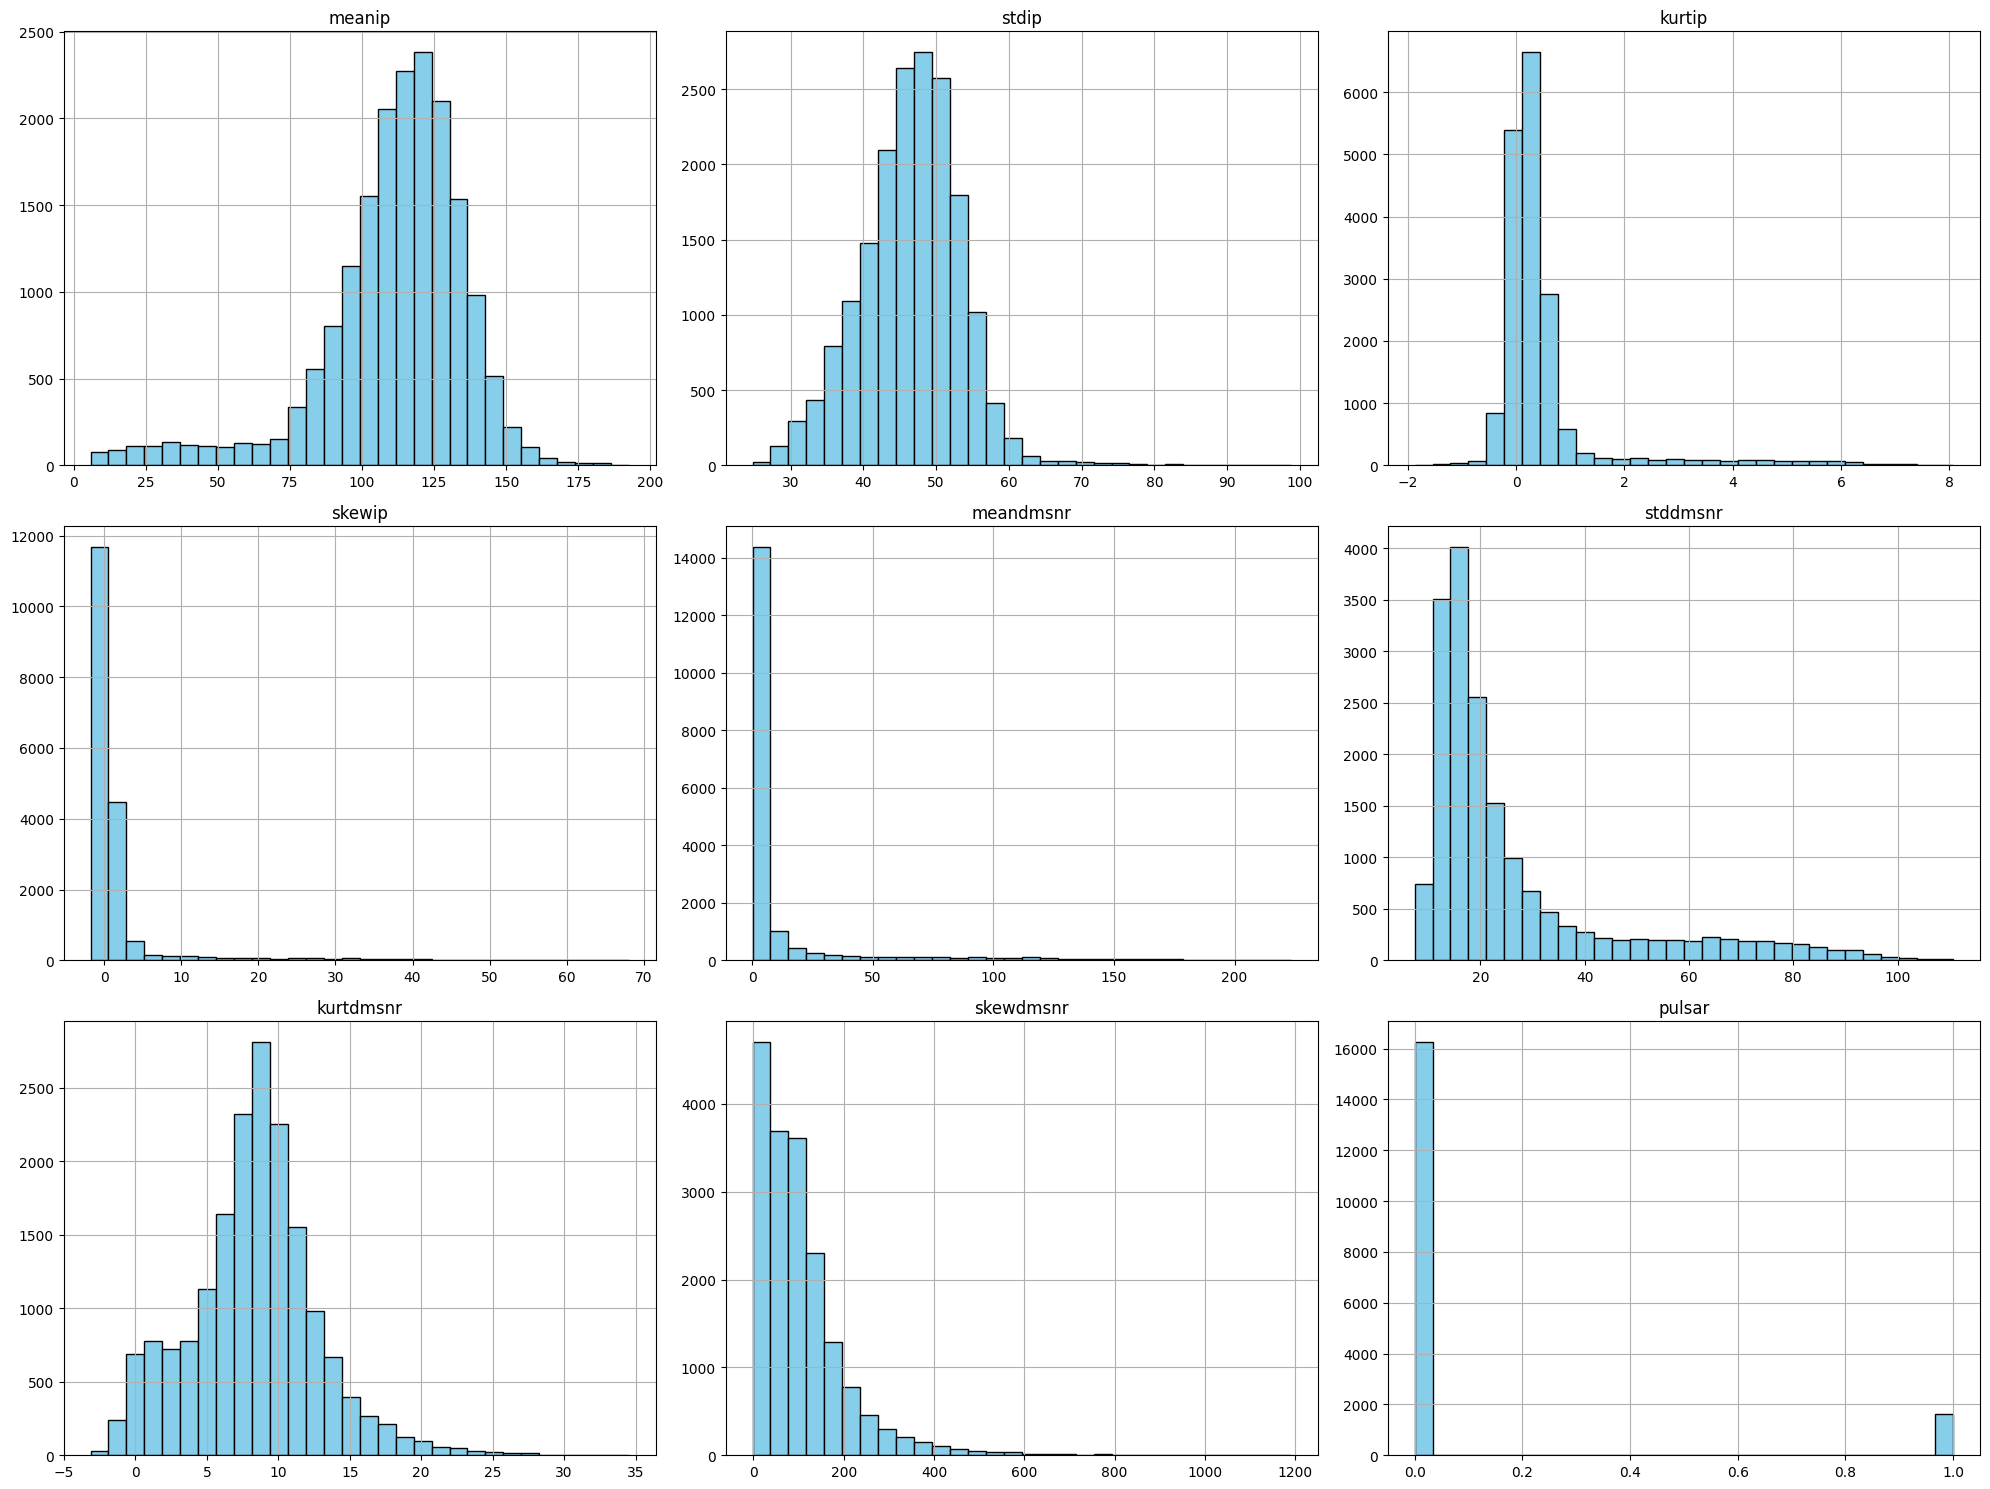

In [ ]:
pulsar.hist(figsize=(20,15), bins=30, color='skyblue', edgecolor='black')

# Display the plots
plt.tight_layout()
plt.show()

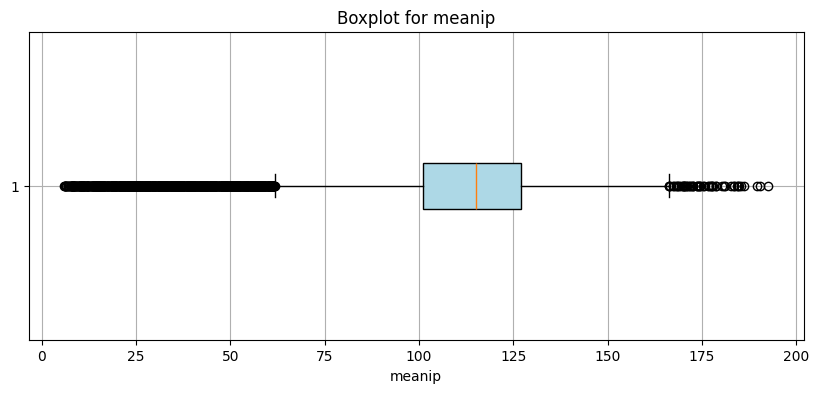

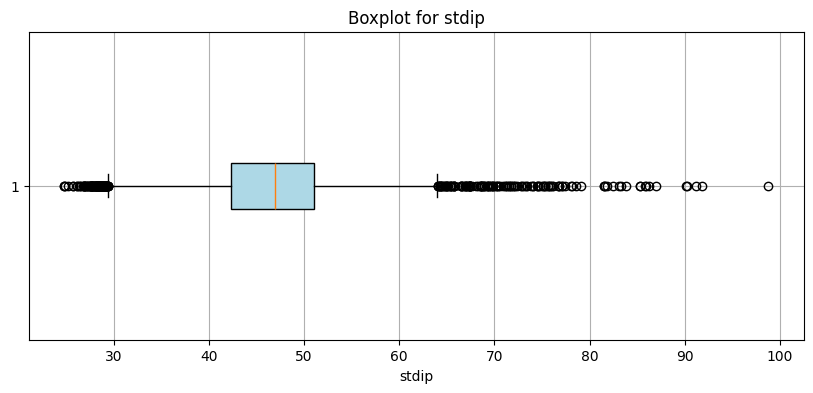

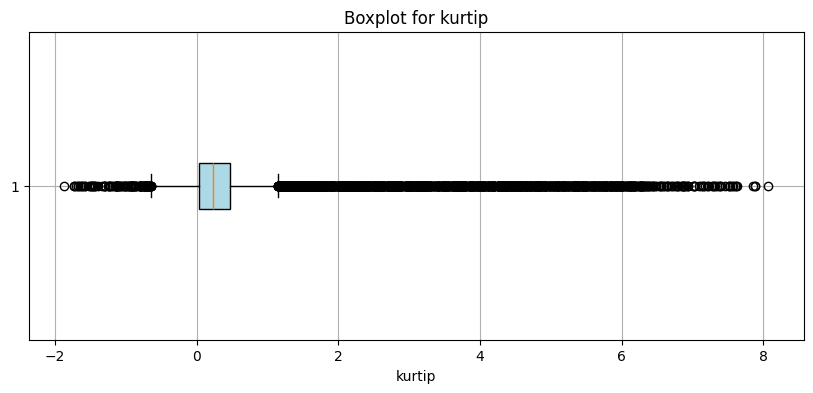

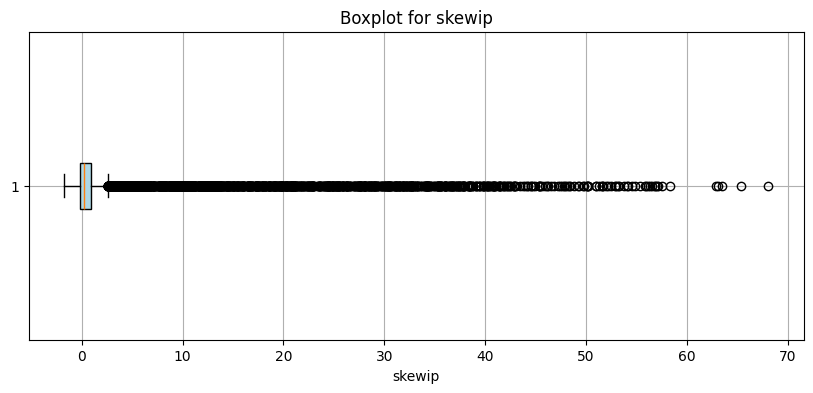

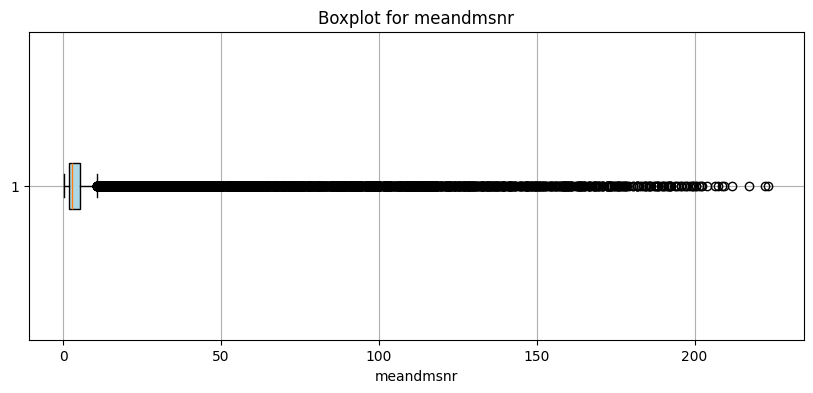

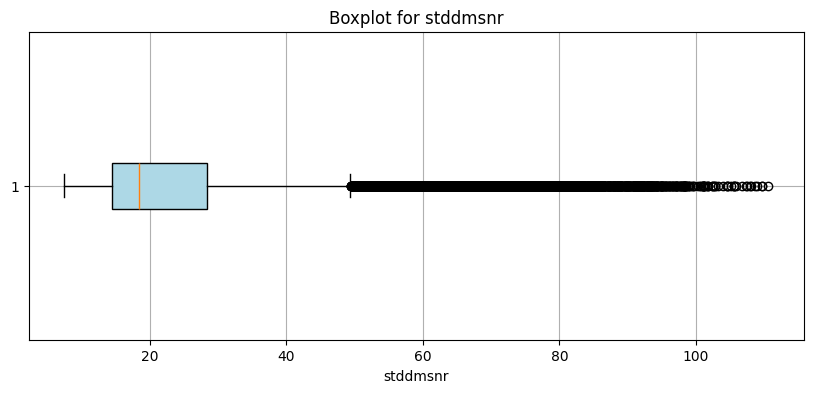

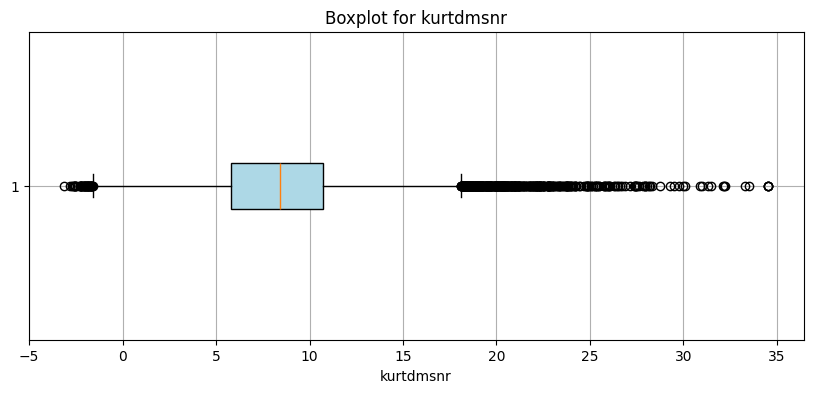

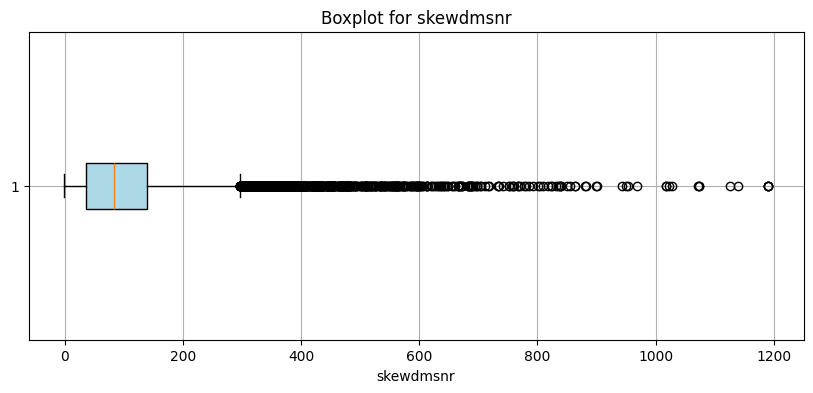

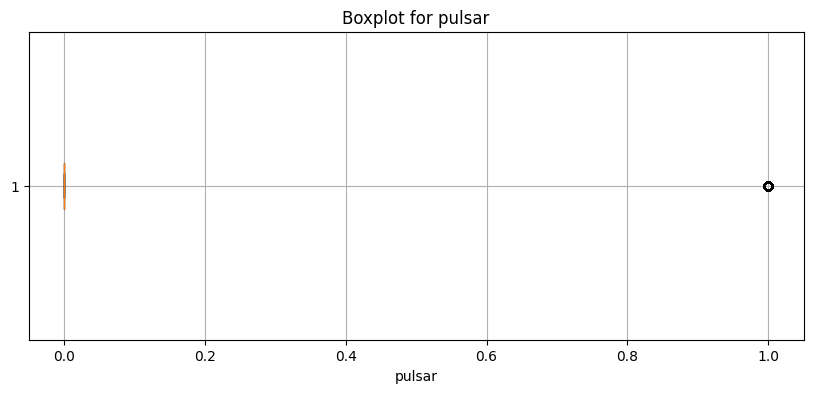

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through numeric columns and create separate boxplots
numeric_cols = pulsar.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.boxplot(pulsar[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue'))

    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()


As seen from the above boxplots, there are columns which have more outliers.
Found out the number of rows to be removed based on the outliers which are  outside the whiskers.  

# Outlier understanding

Based on the below calculation, around 6000 rows are getting dropped.  It means that 1/3rd of the dataset would be dropped out, which is a significant number.
Hence without dropping the outliers, model has been build by including them.

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(dataframe):
    df_out = dataframe.copy()

    # Select only numeric columns
    numeric_cols = ['meanip', 'stdip', 'kurtip', 'skewip', 'meandmsnr', 'stddmsnr','kurtdmsnr', 'skewdmsnr']

    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep rows within the bounds
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]

    return df_out

# Apply the function
df_no_outliers = remove_outliers_iqr(pulsar)

print("Original DataFrame shape:", pulsar.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)
print(df_no_outliers)


Original DataFrame shape: (17898, 9)
DataFrame shape after removing outliers: (11857, 9)
           meanip      stdip    kurtip    skewip  meandmsnr   stddmsnr  \
0      140.562500  55.683782 -0.234571 -0.699648   3.199833  19.110426   
1      102.507812  58.882430  0.465318 -0.515088   1.677258  14.860146   
2      103.015625  39.341649  0.323328  1.051164   3.121237  21.744669   
3      136.750000  57.178449 -0.068415 -0.636238   3.642977  20.959280   
4       88.726562  40.672225  0.600866  1.123492   1.178930  11.468720   
...           ...        ...       ...       ...        ...        ...   
17883   84.421875  41.775555  0.757467  1.107075   1.336120  12.026757   
17884  106.875000  47.571328  0.199440  0.284964   3.079431  20.984455   
17890  143.671875  45.302647 -0.045769  0.353643   5.173913  26.462345   
17892   96.000000  44.193113  0.388674  0.281344   1.871237  15.833746   
17896  114.507812  53.902400  0.201161 -0.024789   1.946488  13.381731   

       kurtdmsnr   ske

Finding if the dataset is imbalanced in terms of target

In [ ]:
print ("Following is the count of rows having pulsar star as 1, which translates to yes it is a pulsar star\n", pulsar[pulsar['pulsar'] == 1].count())
print ("Following is the count of rows having pulsar star as 0, which translates to no it is not a pulsar star\n", pulsar[pulsar['pulsar'] == 0].count())

Following is the count of rows having pulsar star as 1, which translates to yes it is a pulsar star
 meanip       1639
stdip        1639
kurtip       1639
skewip       1639
meandmsnr    1639
stddmsnr     1639
kurtdmsnr    1639
skewdmsnr    1639
pulsar       1639
dtype: int64
Following is the count of rows having pulsar star as 0, which translates to no it is not a pulsar star
 meanip       16259
stdip        16259
kurtip       16259
skewip       16259
meandmsnr    16259
stddmsnr     16259
kurtdmsnr    16259
skewdmsnr    16259
pulsar       16259
dtype: int64


Finding if there are any correlated variables.  The highest is the negative correlation between meanip and kurtip

             meanip     stdip    kurtip    skewip  meandmsnr  stddmsnr  \
meanip     1.000000  0.547137 -0.873898 -0.738775  -0.298841 -0.307016   
stdip      0.547137  1.000000 -0.521435 -0.539793   0.006869 -0.047632   
kurtip    -0.873898 -0.521435  1.000000  0.945729   0.414368  0.432880   
skewip    -0.738775 -0.539793  0.945729  1.000000   0.412056  0.415140   
meandmsnr -0.298841  0.006869  0.414368  0.412056   1.000000  0.796555   
stddmsnr  -0.307016 -0.047632  0.432880  0.415140   0.796555  1.000000   
kurtdmsnr  0.234331  0.029429 -0.341209 -0.328843  -0.615971 -0.809786   
skewdmsnr  0.144033  0.027691 -0.214491 -0.204782  -0.354269 -0.575800   
pulsar    -0.673181 -0.363708  0.791591  0.709528   0.400876  0.491535   

           kurtdmsnr  skewdmsnr    pulsar  
meanip      0.234331   0.144033 -0.673181  
stdip       0.029429   0.027691 -0.363708  
kurtip     -0.341209  -0.214491  0.791591  
skewip     -0.328843  -0.204782  0.709528  
meandmsnr  -0.615971  -0.354269  0.4008

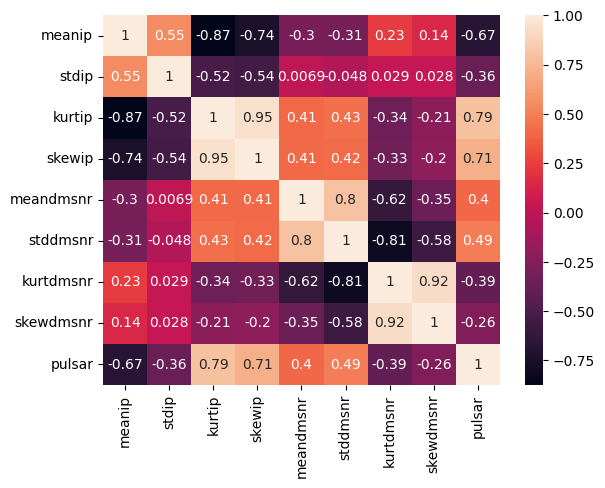

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = pulsar.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Adasyn to address dataset imbalance

Splitting the dataset to train and test in ratio of 80:20

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(pulsar, columns=['meanip','stdip','kurtip','skewip','meandmsnr','stddmsnr','kurtdmsnr','skewdmsnr'])
y = pd.DataFrame(pulsar, columns=['pulsar'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)


As the dataset is imbalanced, doing a Adasyn on training only to generate the synthetic sample of less found target values.

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

#Apply ADASYN on the training set only
adasyn = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)

# Fit ADASYN on the training set to generate synthetic samples
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Checking class distribution in the training set after ADASYN
print("Class distribution after ADASYN (Train set):", Counter(y_resampled['pulsar']))



Class distribution after ADASYN (Train set): Counter({1: 13040, 0: 13007})


Using Robust scaler, to address the outliers present in data

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

scaler = RobustScaler()
X_train = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using Keras tuner

Using the Keras tuner to do hyperparameter tuning to find the number of neurons and dropout rates to be present in first and second layer.
Learning rate hyperparameter tuning is also done.
After completing, the best hyperparameters are obtained.

In [ ]:
import keras
import keras_tuner as kt
def build_model(hp):
    model = Sequential()

    # Tune number of units in first hidden layer
    hp_units_1 = hp.Int('units_1', min_value=8, max_value=64, step=16)
    model.add(Dense(units=hp_units_1, activation='relu', input_shape=(X_train.shape[1],)))

    # Tune dropout after first layer
    hp_dropout_1 = hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout_1))

    # Tune number of units in second hidden layer
    hp_units_2 = hp.Int('units_2', min_value=8, max_value=16, step=8)
    model.add(Dense(units=hp_units_2, activation='relu'))

    # Tune dropout after second layer
    hp_dropout_2 = hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout_2))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate for Adam optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = kt.RandomSearch(
    build_model,                      # the model-building function
    objective='val_accuracy',         # what we want to optimize
    max_trials=10,                    # number of different combinations to try
    executions_per_trial=1           # how many times to train for each combination
    #directory='keras_tuner_dir',      # directory to save tuning logs
    #project_name='diabetes_binary_classification'
)


# Start searching for best hyperparameters
tuner.search(X_train, y_resampled,
             epochs=10,                # you can reduce epochs to speed up search
             validation_data=(X_test, y_test),
             verbose=1)
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best units for 1st layer: {best_hps.get('units_1')}
Best dropout for 1st layer: {best_hps.get('dropout_1')}
Best units for 2nd layer: {best_hps.get('units_2')}
Best dropout for 2nd layer: {best_hps.get('dropout_2')}
Best learning rate: {best_hps.get('learning_rate')}
""")


Trial 10 Complete [00h 00m 30s]
val_accuracy: 0.9136871695518494

Best val_accuracy So Far: 0.9312849044799805
Total elapsed time: 00h 05m 00s

Best units for 1st layer: 56
Best dropout for 1st layer: 0.1
Best units for 2nd layer: 16
Best dropout for 2nd layer: 0.2
Best learning rate: 0.01



# Model Building

Building the ANN model with the outputs of above keras tuner and fitting it to resampled and robustscaled training set.
Evaluating the accuracy on test dataset.

In [ ]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(X_train, y_resampled,
                         epochs=50,
#                         validation_data=(X_test, y_test),
                         verbose=1)

# Evaluate on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8461 - loss: 0.3563
Epoch 2/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8745 - loss: 0.2962
Epoch 3/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8877 - loss: 0.2730
Epoch 4/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8939 - loss: 0.2555
Epoch 5/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8915 - loss: 0.2603
Epoch 6/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8960 - loss: 0.2499
Epoch 7/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8997 - loss: 0.2404
Epoch 8/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9046 - loss: 0.2343
Epoch 9/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9055 - loss: 0.2318
Epoch 10/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9096 - loss: 0.2279
Epoch 11/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9098 - loss: 0.2260
Epoch 12/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy

#Evaluating Model Metrics

Doing the prediction with the above best_model on test dataset and printing the confusion matrix with accuracy details.

Calculating Accuracy, Confusion matrix, ROC curve for the models

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9131
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3252
           1       0.51      0.93      0.66       328

    accuracy                           0.91      3580
   macro avg       0.75      0.92      0.81      3580
weighted avg       0.95      0.91      0.92      3580



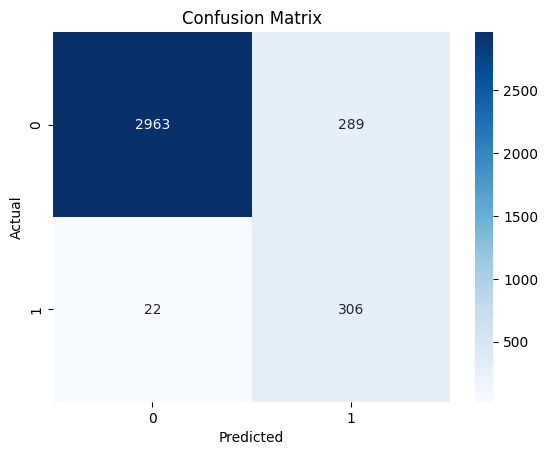

In [ ]:
# Evaluate on test data
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Plotting the map of model accuracy over the number of epochs trained.

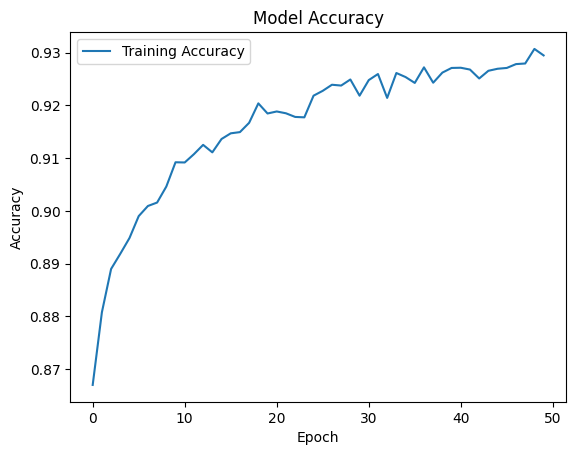

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


Plotting ROC curve

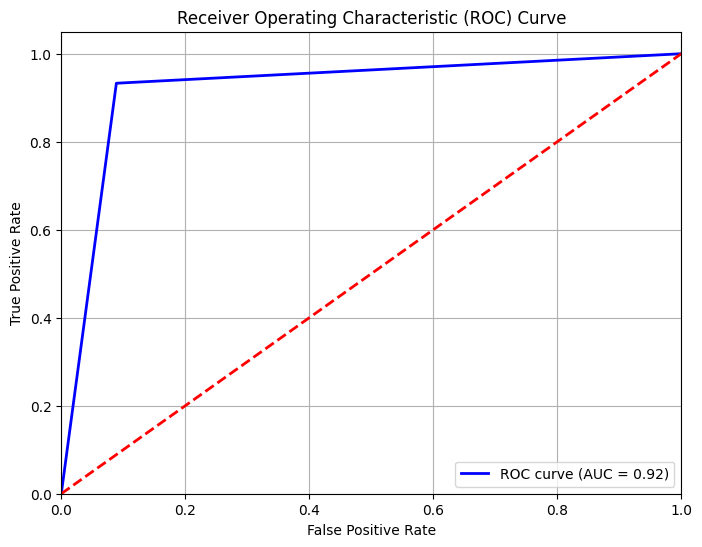

In [ ]:
from sklearn.metrics import roc_curve, auc
# Get FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Building an alternative RandomForest Classifier model.
========================================================

A simple random forest classifier has been built to evaluate the efficiency.  
It has been found out that it outperforms the ANN model in terms of Accuracy, F1 and ROC scores.
This is because random forests are decision tree based algorithms and are not prone for outliers present in data.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3252
           1       0.76      0.90      0.82       328

    accuracy                           0.96      3580
   macro avg       0.87      0.93      0.90      3580
weighted avg       0.97      0.96      0.97      3580



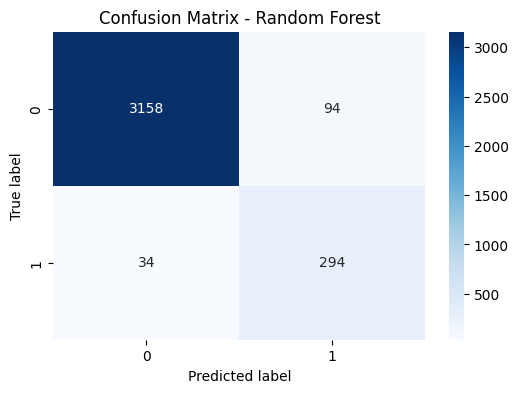

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Create a Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Max depth of each tree
    random_state=42        # Reproducibility
)

# Train the model
rf_model.fit(X_train, y_resampled)

# Make predictions
y_predrf = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_predrf)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_predrf))

# Confusion matrix
cm = confusion_matrix(y_test, y_predrf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
            #xticklabels=data.target_names,
            #yticklabels=data.target_names)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Alternative model metrics

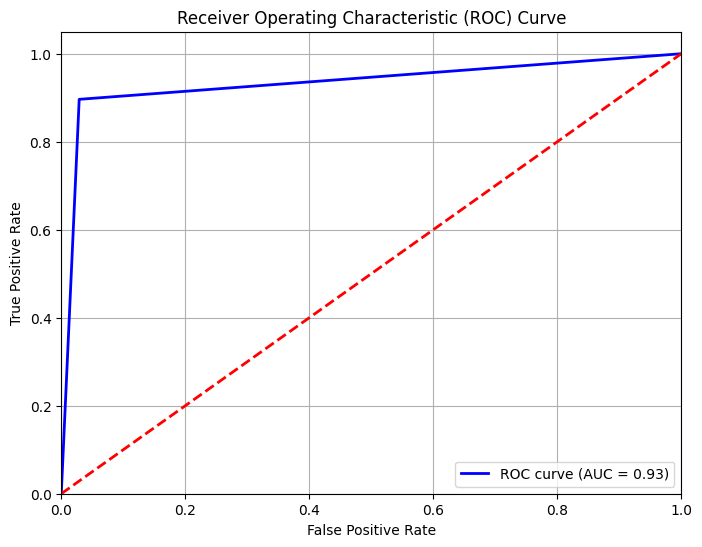

In [ ]:
from sklearn.metrics import roc_curve, auc
# Get FPR, TPR and thresholds
fprrf, tprrf, thresholdsrf = roc_curve(y_test, y_predrf)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fprrf, tprrf)

plt.figure(figsize=(8, 6))
plt.plot(fprrf, tprrf, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Conclusion

In this project, business problems, data source and understanding, methods, models, analysis, model metrics, assumptions, limitations, challenges, future uses, recommendations, implementation, ethical implications and answers for the questions that the audience might ask has been discussed in detail.

An Artificial Neural Network model has been built with Keras and Keras tuner has been used for hyperparameter evaluation and the following model metrics obtained,

Accuracy = 91%
F1 score = 95% for class 0 and 66% for class 1.
RoC = 0.92

One another alternative RandomForest model has also been built the following model metrics obtained which are far better than the earlier ANN model.  

Accuracy = 96%
F1 score = 98% for class 0 and 82% for class 1.
RoC = 0.93

As seen from the model metrics evaluation and comparison, RandomForest model has been recommended over ANN model.
